<a href="https://colab.research.google.com/github/armelyara/Binary_classification/blob/main/Keras_3_0_The_Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras 3.0: Sequential model for images classification**

In this tutorial, you will learn step-by-step the designing sequential model with Keras 3.0 with TensorFlow in backend.

Otherwise, the data is the forest and mountain images and the Machine Learning problem we want to solve is a binary classification.

Finally, we choose the supervised learning method where the data are labelled (Two class) to address our problem.

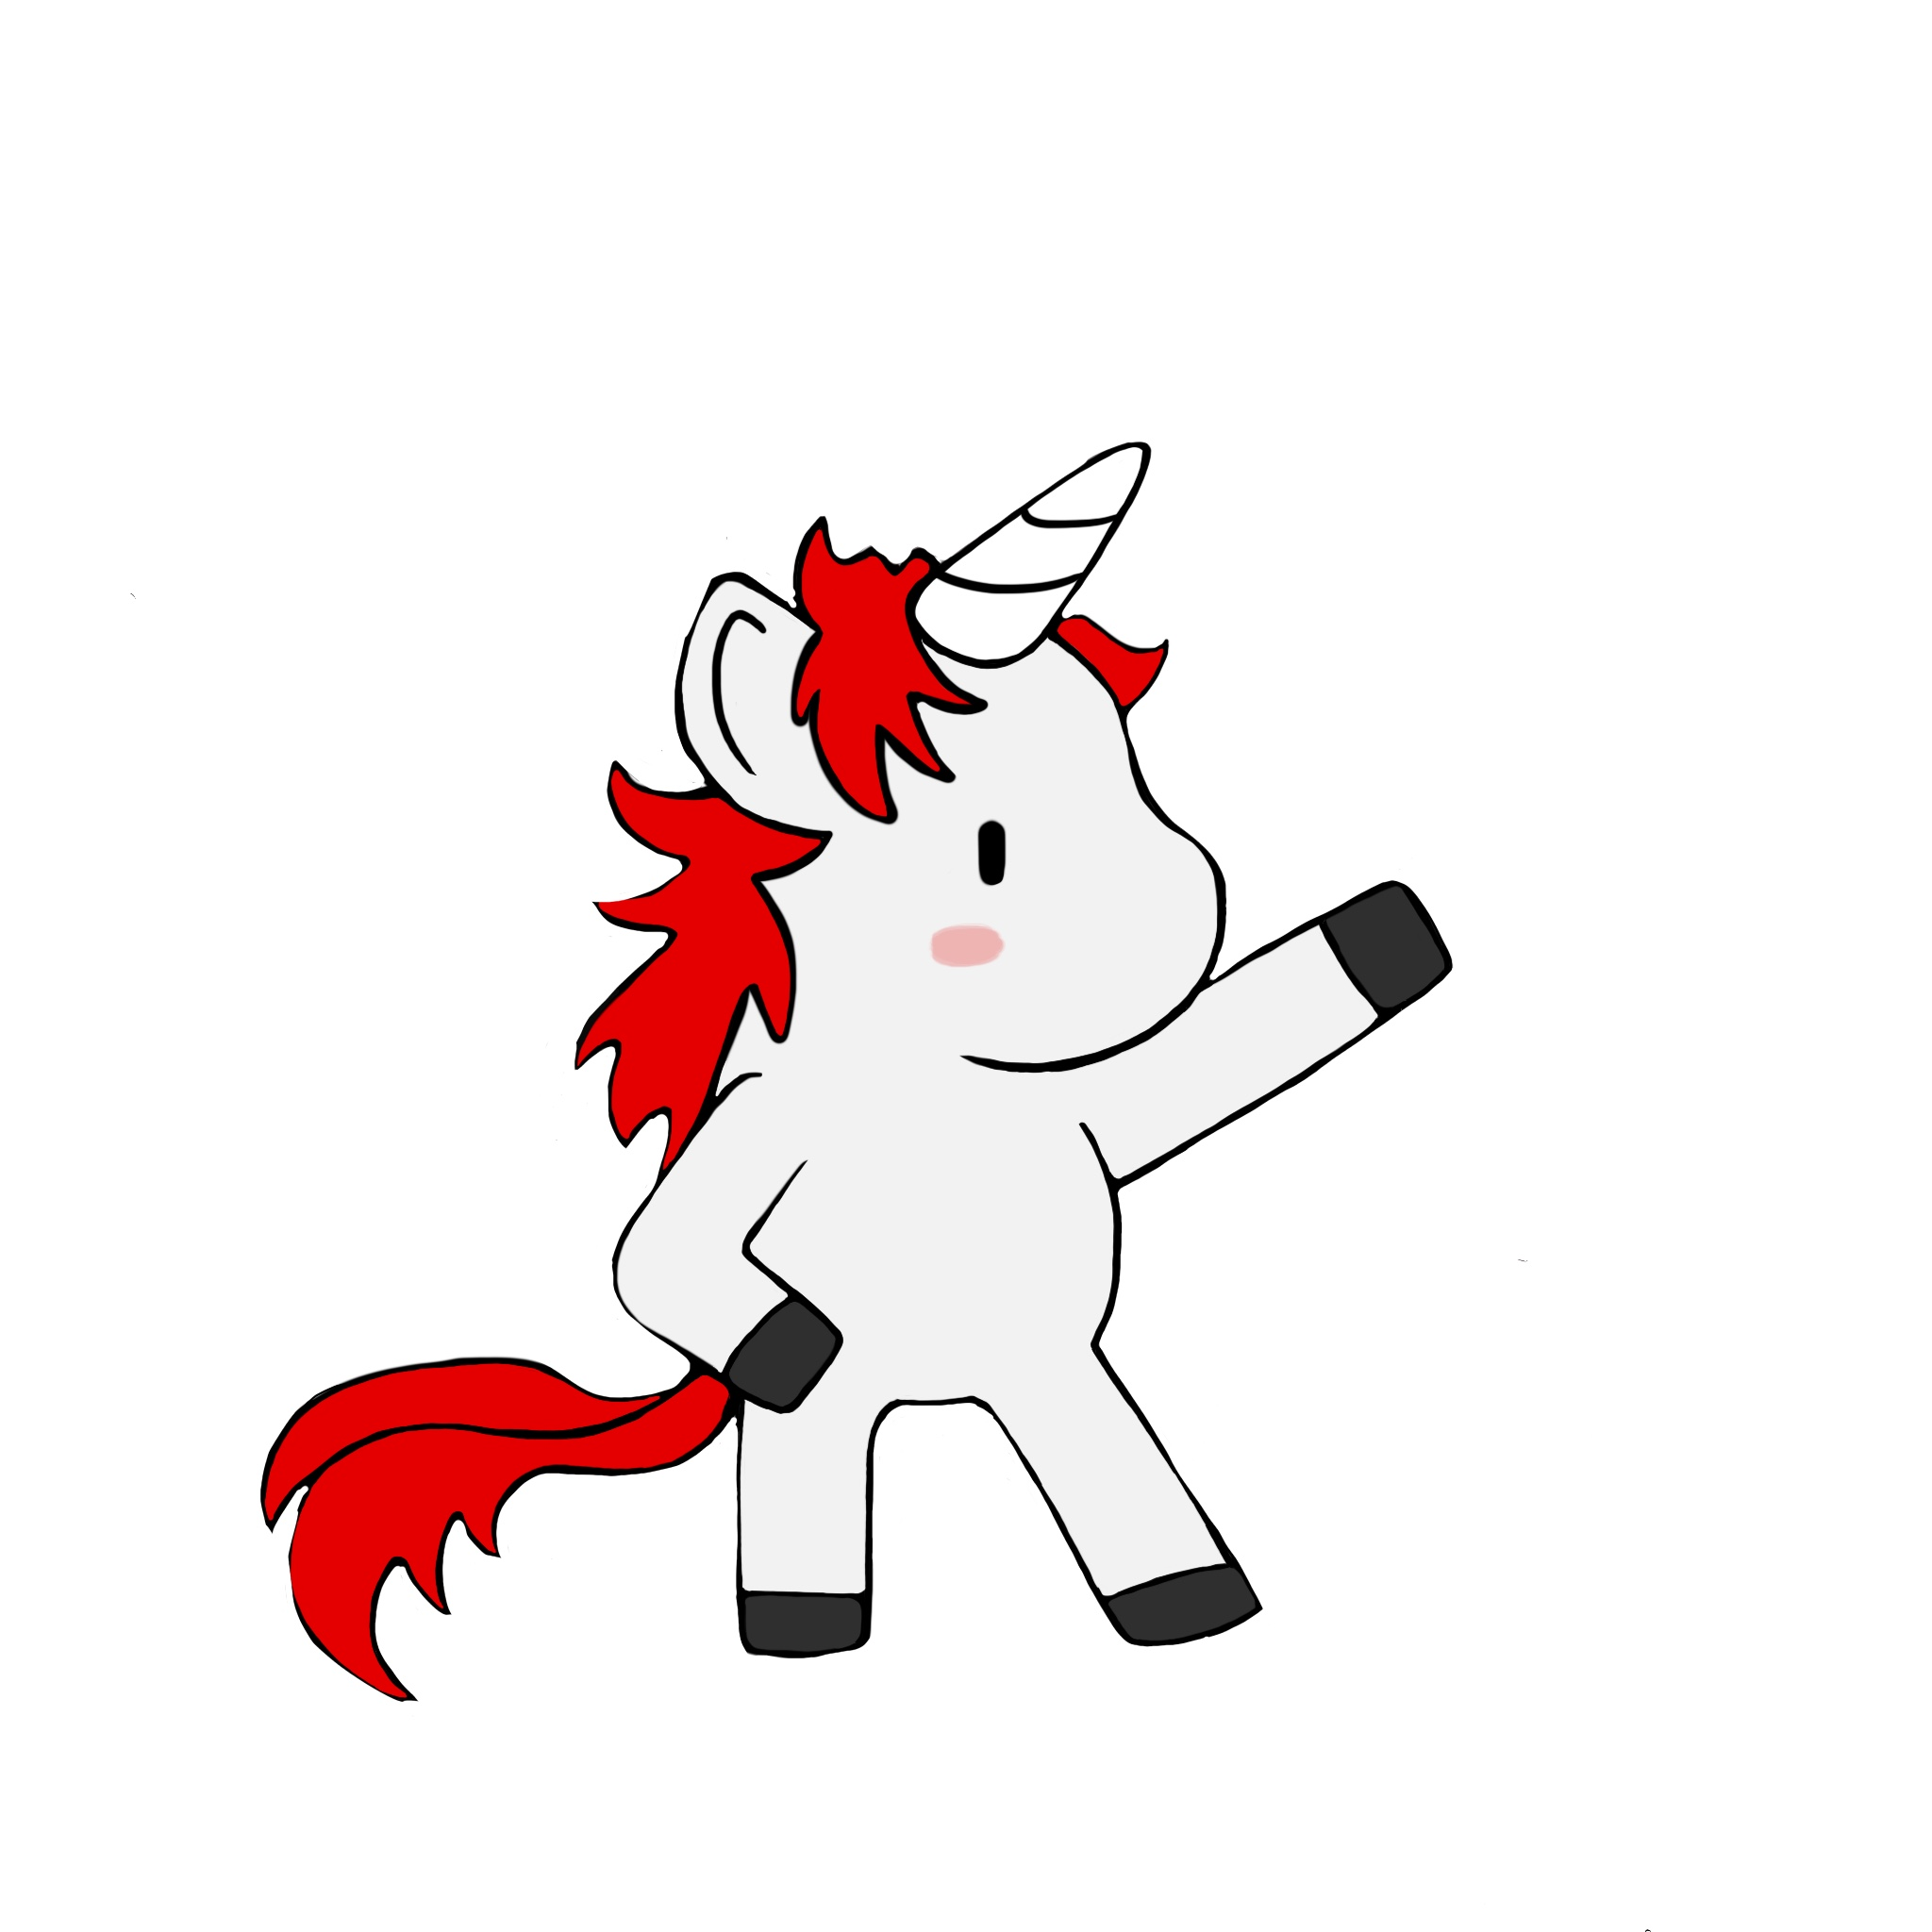


# **DATA PROCESSING**

In [2]:
# Import packages
import os
import zipfile
import keras
import tensorflow as tf
from keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
# Choose TensorFlow as keras backend
os.environ["KERAS_BACKEND"] = "tensorflow"

In [4]:
# Create data pathfile
local_zip = 'keras_seq.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('forestvsmount')
zip_ref.close()

# Define the dataset path
base_dir = 'forestvsmount/'
train_dir = 'forestvsmount/keras_seq/train/'
test_dir = 'forestvsmount/keras_seq/test/'

In [5]:
# Set the path of train and test data
train_dir = os.path.join(base_dir, 'keras_seq/train/')
test_dir = os.path.join(base_dir, 'keras_seq/test/')

# Data train folder forest/mountain
train_forest_dir = os.path.join(train_dir, 'forest')
train_mountain_dir = os.path.join(train_dir, 'mountain')


# Data test folder forest/mountain
test_forest_dir = os.path.join(test_dir, 'forest')
test_mountain_dir = os.path.join(test_dir, 'mountain')


In [6]:
# Print the first images
train_mountain_fnames = os.listdir( train_forest_dir )
train_forest_fnames = os.listdir( train_mountain_dir )

print(train_mountain_fnames[:10])
print(train_forest_fnames[:10])

['15466.jpg', '8764.jpg', '9096.jpg', '18207.jpg', '19509.jpg', '8076.jpg', '8769.jpg', '15144.jpg', '10281.jpg', '8198.jpg']
['2875.jpg', '8409.jpg', '3828.jpg', '2175.jpg', '10636.jpg', '6726.jpg', '1919.jpg', '14986.jpg', '11346.jpg', '12639.jpg']


In [7]:
# Print the total number of images of mountain and forest in the
# folder `train` et `test`

print('total training mountain images :', len(os.listdir(train_mountain_dir)))
print('total training forest images :', len(os.listdir(train_forest_dir)))


print('total test mountain images :', len(os.listdir( test_mountain_dir)))
print('total test forest images :', len(os.listdir( test_forest_dir)))

total training mountain images : 2512
total training forest images : 2271
total test mountain images : 525
total test forest images : 474


In [8]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 5 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='categorical',
                                                    target_size=(300, 300))
# --------------------
# Flow validation images in batches of 5 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=5,
                                                         class_mode  = 'categorical',
                                                         target_size = (300, 300))

Found 4783 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


# **SEQUENTIAL MODEL WITH CONVOLUTIONAL NEURAL NETWORK**

In this part, we build sequential model with five convolutional layers to learn from image dataset.


In [9]:
# Building our sequential model with Keras 3.0
model = keras.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    keras.layers.Input(shape=(300, 300, 3)),
    # First convolutional layer
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # Second convolutional layer
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # Third convolutional layer
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # Fourth convolutional layer
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # Fifth convolutional layer
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    # 512 neuron hidden layer
    keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('mountain') and 1 for the other ('forest')
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,319,490 (12.66 MB)

 Trainable params: 3,319,490 (12.66 MB)

 Non-trainable params: 0 (0.00 B)

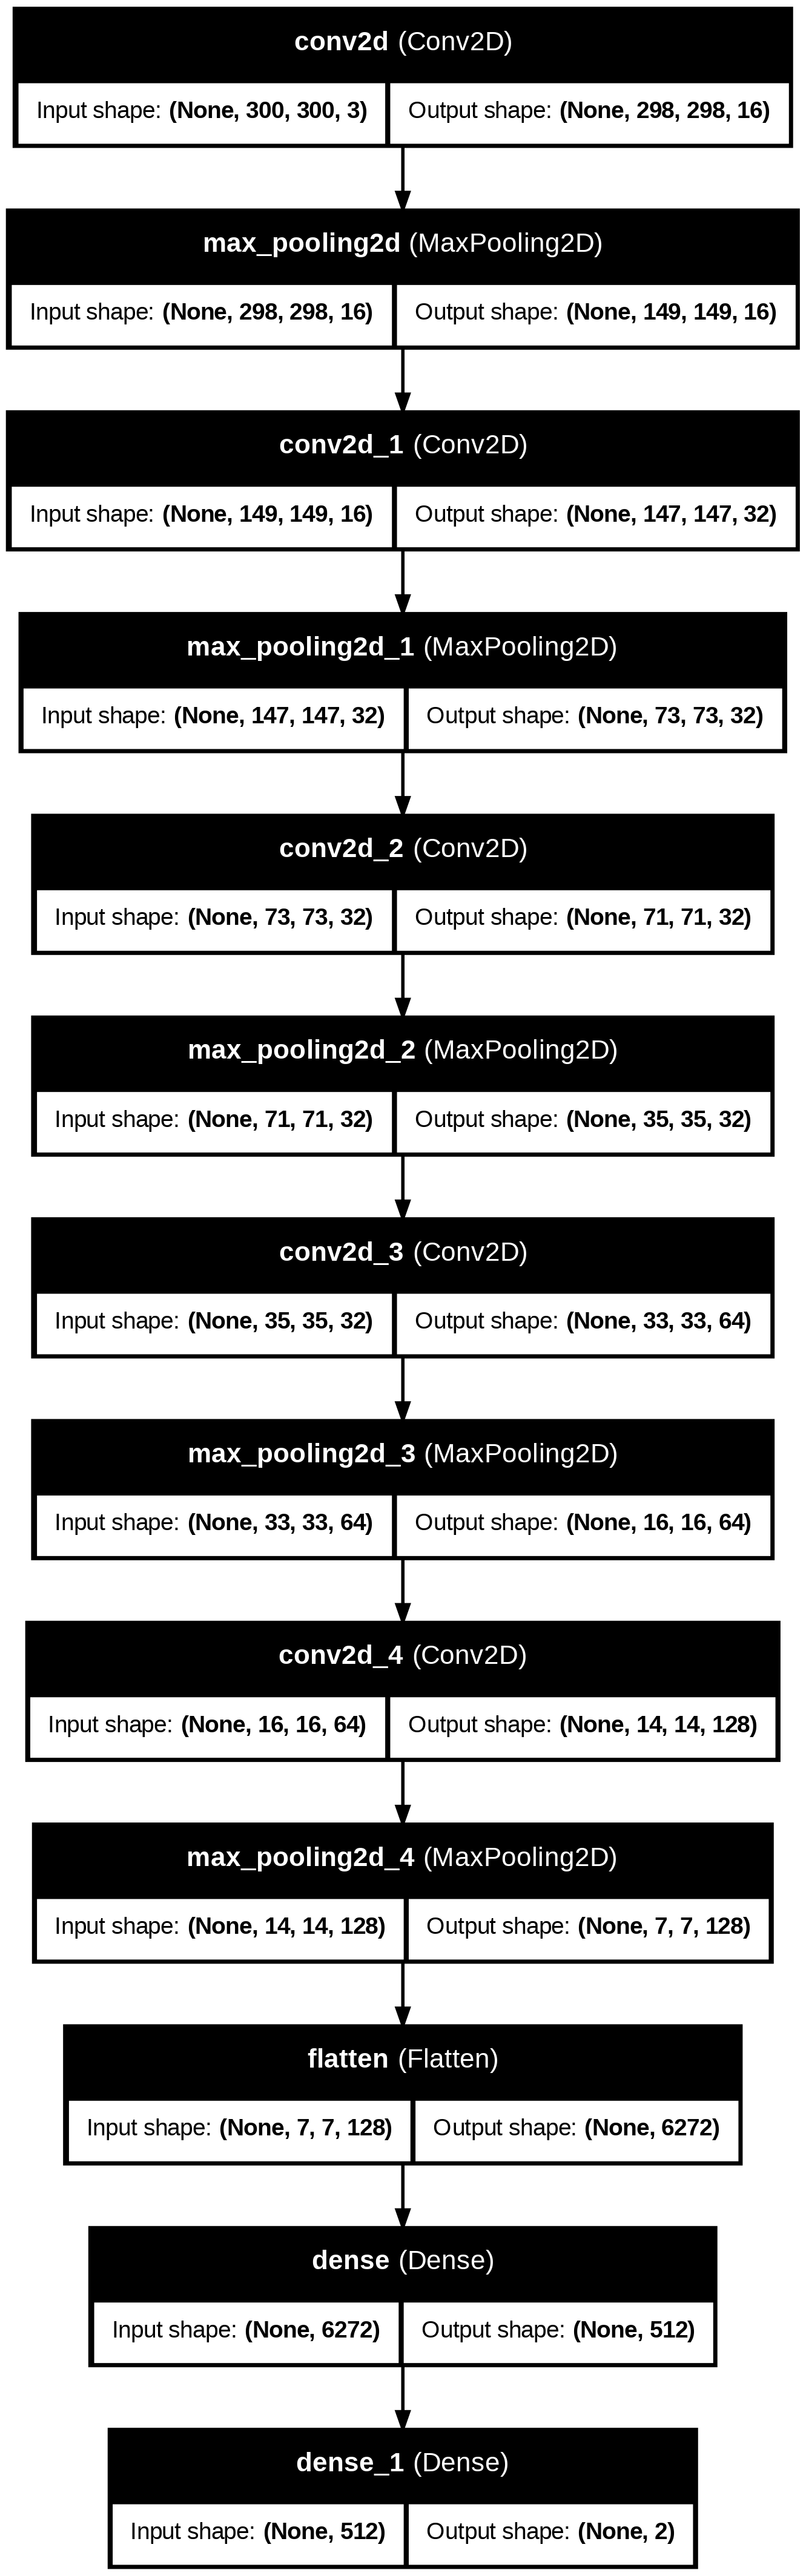

In [10]:
# Assuming you have your Keras model defined as 'model'
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
# Model Training
history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=5,
                              epochs=15,
                              validation_steps=5,
                              verbose=2)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 - 4s - 896ms/step - accuracy: 0.3600 - loss: 0.7768 - val_accuracy: 0.3600 - val_loss: 0.6983
Epoch 2/15
5/5 - 3s - 643ms/step - accuracy: 0.5200 - loss: 0.6878 - val_accuracy: 0.3200 - val_loss: 0.6818
Epoch 3/15
5/5 - 3s - 624ms/step - accuracy: 0.5200 - loss: 0.6635 - val_accuracy: 0.6000 - val_loss: 0.6886
Epoch 4/15
5/5 - 2s - 452ms/step - accuracy: 0.7200 - loss: 0.6382 - val_accuracy: 0.8000 - val_loss: 0.5042
Epoch 5/15
5/5 - 2s - 479ms/step - accuracy: 0.7600 - loss: 0.4492 - val_accuracy: 0.7200 - val_loss: 0.5073
Epoch 6/15
5/5 - 2s - 465ms/step - accuracy: 0.9200 - loss: 0.2924 - val_accuracy: 0.9600 - val_loss: 0.0646
Epoch 7/15
5/5 - 3s - 554ms/step - accuracy: 0.7600 - loss: 0.7293 - val_accuracy: 0.9200 - val_loss: 0.3485
Epoch 8/15
5/5 - 3s - 671ms/step - accuracy: 0.8800 - loss: 0.3283 - val_accuracy: 0.6400 - val_loss: 0.6419
Epoch 9/15
5/5 - 2s - 462ms/step - accuracy: 0.9200 - loss: 0.1989 - val_accuracy: 0.9600 - val_loss: 0.0502
Epoch 10/15
5/5 - 2s - 469ms/s

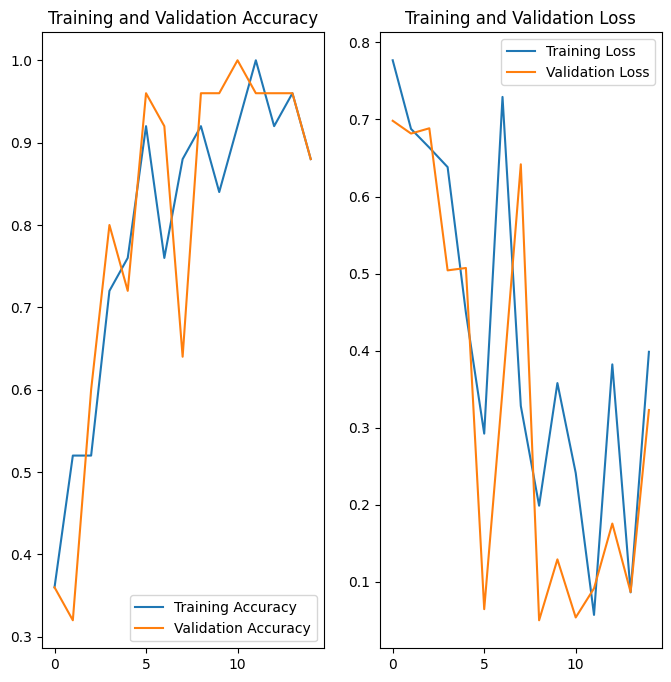

In [13]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 15
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# Testing the model in the real world
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  # prediction images
  path='/content/' + fn
  img=image.load_img(path, target_size=(300, 300))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes.any():
    print(fn + "is a mountain")

  else:
    print(fn + "is a forest")


Saving Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg to Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[0. 1.]
Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpgis a mountain
